In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
x=np.arange(20)+1

# 一次模型 $y=a+bx$

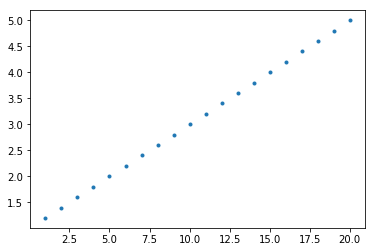

In [4]:
plt.plot(x,1+0.2*x,'.')

# 对数模型：$y=a+blog(x)$

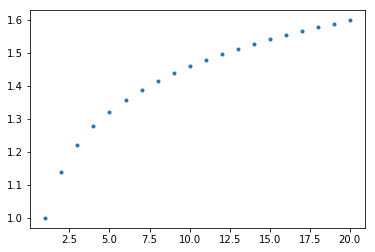

In [5]:
plt.plot(x,1+0.2*np.log(x),'.')

# 指数模型：$y=a\mathop{{e}}^x$

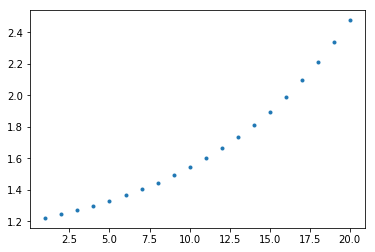

In [6]:
plt.plot(x,1+0.2*np.exp(0.1*x),'.')

# 幂函数：$y=ax^b$

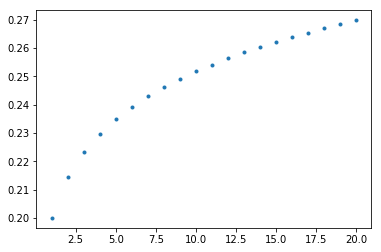

In [7]:
plt.plot(x,0.2*x**0.1,'.')

In [12]:
QTdata=pd.read_excel('DaPy.xlsx','QTdata',index_col=0)
#读取数据，其中第二个参数表示的excel的表单名，第三个参数表示把0列作为行索引
QTdata['Year']=QTdata.index.str[:4]#生成年度变量
YGDP=QTdata.groupby(['Year'])['GDP'].sum() #形成年度时间序列数据
YGDP.head()

Year
2001    10.966
2002    12.033
2003    13.582
2004    15.988
2005    18.494
Name: GDP, dtype: float64

In [19]:
import statsmodels.api as sm
Yt=YGDP
X1=np.arange(len(Yt))+1
Yt_L1=sm.OLS(Yt,sm.add_constant(X1)).fit() #进行线性回归
round(Yt_L1.summary2().tables[1],4)#显示主要结果

D:\Anaconda\Anaconda\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,-0.2149,1.9389,-0.1108,0.9134,-4.4035,3.9738
x1,4.3127,0.2132,20.2240,0.0000,3.8520,4.7734


In [20]:
print("判别系数为：",Yt_L1.summary2().tables[0][1][6])

判别系数为： 0.969


D:\Anaconda\Anaconda\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


### 由于回归模型输出结果较多，故构建一个简单的趋势函数来进行模型选择

In [21]:
import warnings #忽视警告信息
warnings.filterwarnings('ignore')
def trendmodel(y,x): #定义两个变量直线趋势回归模型，x为自变量，y为因变量
    fm=sm.OLS(y,sm.add_constant(x)).fit()
    sfm=fm.summary2()
    print('模型检验：、\n',sfm.tables[1])
    print('判别系数为：',sfm.tables[0][1][6])
    return fm.fittedvalues

模型检验：、
           Coef.  Std.Err.          t         P>|t|    [0.025    0.975]
const -0.214895  1.938859  -0.110836  9.134393e-01 -4.403545  3.973755
x1     4.312679  0.213246  20.223954  3.300261e-11  3.851988  4.773369
判别系数为： 0.969


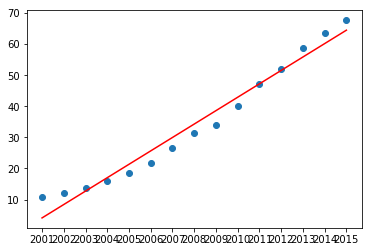

In [22]:
L1=trendmodel(Yt,X1)
plt.plot(Yt,'o',L1,'r-')

### 指数曲线

模型检验：、
           Coef.  Std.Err.          t         P>|t|    [0.025    0.975]
const  2.247002  0.031854  70.540236  3.472979e-18  2.178185  2.315819
x1     0.139563  0.003503  39.835307  5.652923e-15  0.131994  0.147132
判别系数为： 0.992


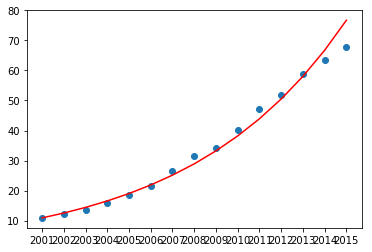

In [23]:
L2=trendmodel(np.log(Yt),X1)
plt.plot(Yt,'o',np.exp(L2),'r-')